In [2]:
import pandas as pd
from pathlib import Path
import sys

ROOT = Path.cwd().parent
sys.path.append(str(ROOT))

print("ROOT:", ROOT)

from src.tesla_data import (
    load_tesla_data,
    split_by_region,
    add_date_column,
)

# 1) 데이터 로드
data_path = ROOT / "data" / "tesla_deliveries_dataset_2015_2025.csv"
df = load_tesla_data(data_path)

# 2) Region별 분리
region_dfs = split_by_region(df, region_col="Region", drop_region_col=True)

# Asia 데이터 확인
asia_df = add_date_column(region_dfs["Asia"])
asia_df.head()


ROOT: /home/nakyung/projects/tesla


,Year,Month,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations,Date
0,2015,1,Cybertruck,11325,11887,54449.08,60,339,575.88,Estimated (Region),6902,2015-01-01
1,2015,1,Model 3,8795,9165,87988.73,82,456,601.58,Official (Quarter),12626,2015-01-01
2,2015,1,Model S,9537,10093,68994.43,82,484,692.39,Official (Quarter),7281,2015-01-01
3,2015,1,Model X,7292,7298,107082.30,120,702,767.85,Estimated (Region),11748,2015-01-01
4,2015,1,Model Y,12446,13885,55183.13,60,340,634.75,Official (Quarter),4390,2015-01-01


In [13]:
import importlib
# 1) 모듈 단위로 import
import src.tesla_data as tesla_data
import src.tesla_timeseries as ts

# 2) 파일 수정 후 최신 내용으로 강제 리로드
importlib.reload(tesla_data)
importlib.reload(ts)

<module 'src.tesla_timeseries' from '/home/nakyung/projects/tesla/src/tesla_timeseries.py'>


[그래프 설명] 월별 판매량 트렌드 (Asia)
- 목적: 시간이 지남에 따라 월별 추정 판매량(Estimated_Deliveries)의 증가/감소 패턴을 확인하기 위함.
- 핵심 포인트:
  • 어느 시기에 판매가 급증/급감했는지 확인
  • 장기적으로 우상향/우하향 추세인지 관찰
  • 특정 이벤트(출시, 정책, 경기변동 등)와 시점이 맞물리는지 해석에 활용

=== [Monthly Deliveries Stats]  - Asia ===
기간: 2015-01-01 ~ 2025-12-01
총합: 6,539,935
평균: 49,545.0
최소: 28,813, 최대: 73,430
최근 5개(monthly):
Date
2025-08-01    56646
2025-09-01    44458
2025-10-01    40427
2025-11-01    51465
2025-12-01    56981
Name: Estimated_Deliveries, dtype: int64 



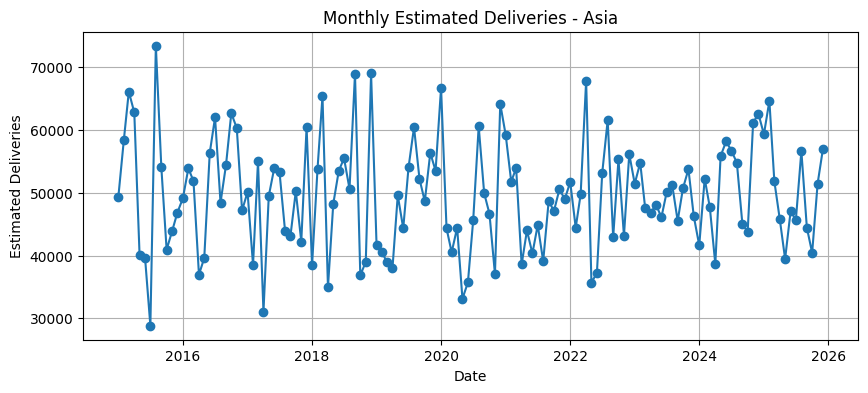


[그래프 설명] 생산량 vs 판매량 시계열 비교 (Asia)
- 목적: 같은 기간 동안 생산량과 판매량이 어떻게 움직이는지, 생산이 수요를 따라가고 있는지 확인하기 위함.
- 핵심 포인트:
  • 생산량이 판매량보다 지속적으로 높은지/낮은지 확인
  • 공급 부족(판매>생산) 또는 재고 증가(생산>판매) 가능성 탐색
  • 두 시계열 간 상관관계를 통해 수급 균형 여부를 해석

=== [Production vs Deliveries Stats]  - Asia ===
기간: 2015-01-01 ~ 2025-12-01
평균 값:
Estimated_Deliveries    49544.96
Production_Units        53139.21
dtype: float64
판매/생산 비율(평균): 0.933
판매량-생산량 상관계수: 0.995
최근 5개(monthly):
            Estimated_Deliveries  Production_Units
Date                                              
2025-08-01                 56646             59546
2025-09-01                 44458             47812
2025-10-01                 40427             42358
2025-11-01                 51465             54168
2025-12-01                 56981             61453 



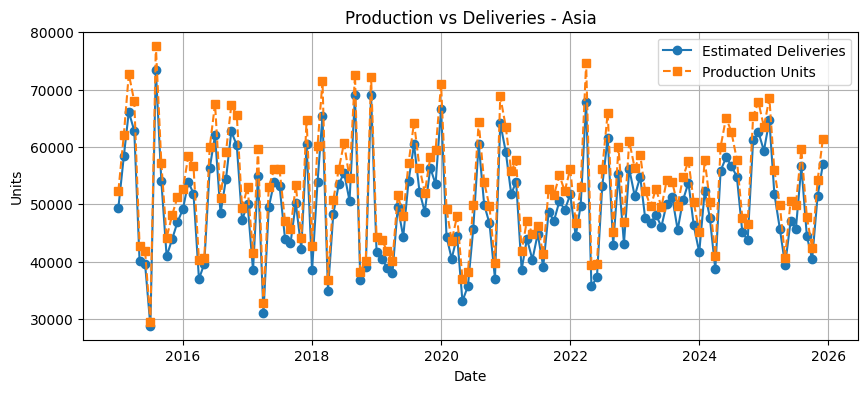


[그래프 설명] 평균 판매 가격 시계열 (Asia)
- 목적: 시간 경과에 따라 평균 판매 가격(Avg_Price_USD)이 어떻게 변하는지 확인하기 위함.
- 핵심 포인트:
  • 신모델 출시, 옵션 변화, 환율 등의 영향으로 가격 레벨이 바뀌는지 확인
  • 장기적으로 고가화(업셀링) 또는 저가화(보급형 확대) 추세인지 파악
  • 가격 변동과 판매량 변화가 같이 움직이는지 다른 분석과 연결할 수 있음

=== [Average Price Stats]  - Asia ===
기간: 2015-01-01 ~ 2025-12-01
평균 가격: 85,161.73 USD
최소: 66,228.60, 최대: 108,675.95
최근 5개(monthly):
Date
2025-08-01    89352.396
2025-09-01    93174.658
2025-10-01    90062.856
2025-11-01    97992.702
2025-12-01    79194.846
Name: Avg_Price_USD, dtype: float64 



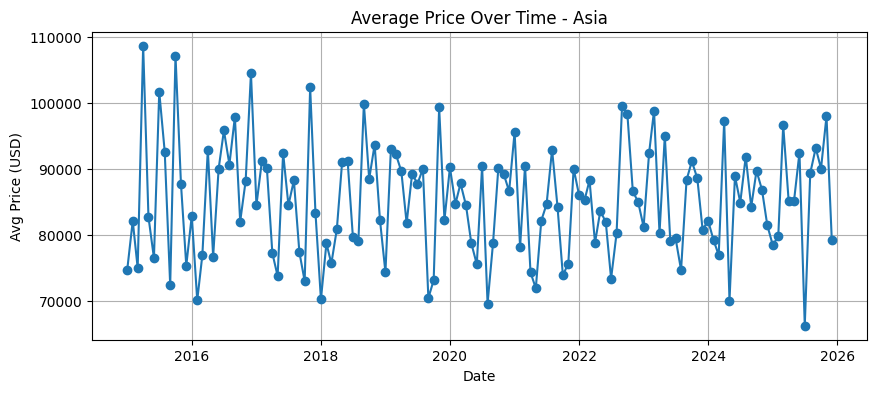


[그래프 설명] 모델별 시장 점유율(stackplot) (Asia)
- 목적: 각 시점에서 모델별 판매 비중(점유율)이 어떻게 변화하는지 확인하기 위함.
- 핵심 포인트:
  • 어느 시점부터 어떤 모델이 '주력 모델'로 떠오르는지 확인
  • 기존 모델의 비중이 줄고 신모델이 치고 올라오는 교체 패턴 관찰
  • 특정 모델에 지나치게 의존하는 구조인지, 포트폴리오가 분산되어 있는지 평가

=== [Model Share Stats]  - Asia ===
기간: 2015-01-01 ~ 2025-12-01
전체 기간 평균 점유율:
Model
Model S       0.215
Model 3       0.208
Model X       0.197
Model Y       0.197
Cybertruck    0.183
dtype: float64

가장 최근 날짜(2025-12-01) 점유율:
Model
Model Y       0.260
Model X       0.240
Model S       0.224
Model 3       0.148
Cybertruck    0.128
Name: 2025-12-01 00:00:00, dtype: float64 



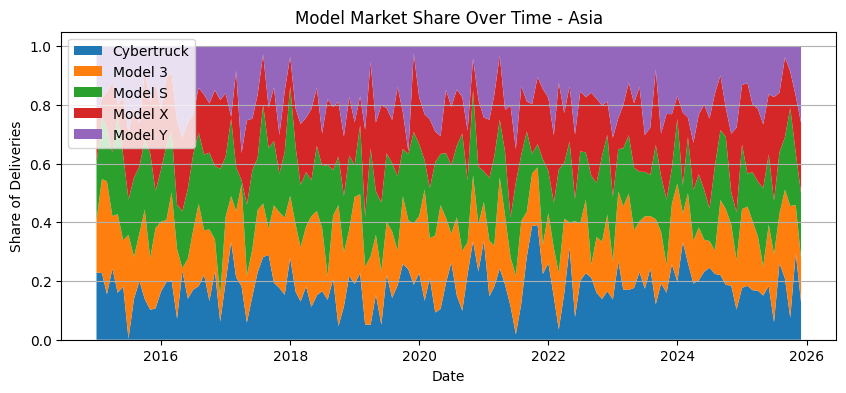


[그래프 설명] 배터리 용량 & 주행거리 시계열 (Asia)
- 목적: 배터리 용량과 1회 충전 주행거리(Range)가 함께 어떻게 개선되어 왔는지 살펴보기 위함.
- 핵심 포인트:
  • 배터리 용량 증가가 곧바로 주행거리 증가로 이어지는지 확인
  • 어느 시점부터 효율 개선(동일 용량 대비 더 긴 주행거리)이 나타나는지 관찰
  • 기술 발전의 속도와 판매 전략(고성능/롱레인지 모델 강조 등) 해석에 활용

=== [Battery & Range Stats]  - Asia ===
기간: 2015-01-01 ~ 2025-12-01
평균 값:
Battery_Capacity_kWh     86.13
Range_km                495.50
dtype: float64
Battery-Range 상관계수: 0.994
최근 5개(monthly):
            Battery_Capacity_kWh  Range_km
Date                                      
2025-08-01                 100.8     599.2
2025-09-01                  81.0     461.2
2025-10-01                  86.0     493.4
2025-11-01                  96.4     557.4
2025-12-01                  87.4     504.8 



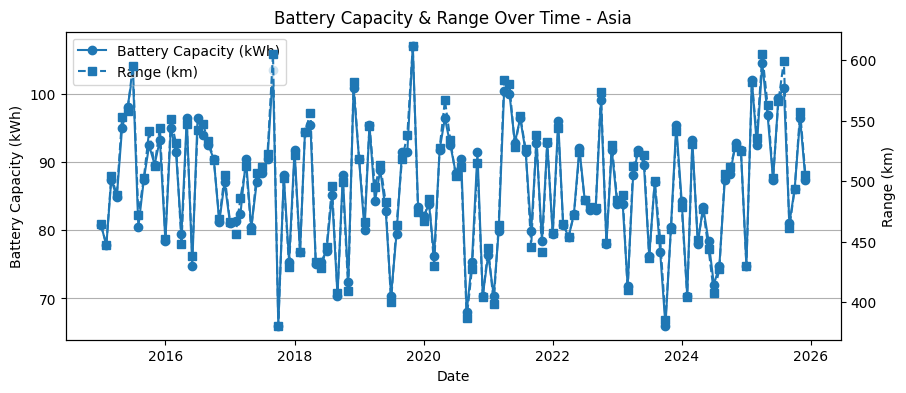


[그래프 설명] 충전 인프라 vs 판매량 시계열 (Asia)
- 목적: 충전소 수(인프라 확충)가 판매량 증가와 얼마나 연결되어 있는지 확인하기 위함.
- 핵심 포인트:
  • 충전 인프라가 빠르게 늘어난 구간에서 판매량도 같이 증가하는지 확인
  • 인프라는 늘었는데 판매는 정체된 구간이 있는지(비효율 가능성) 탐색
  • 충전 인프라 전략이 실제 수요 창출에 어느 정도 기여하는지 정성적으로 해석

=== [Infrastructure vs Sales Stats]  - Asia ===
기간: 2015-01-01 ~ 2025-12-01
평균 값:
Estimated_Deliveries    49544.96
Charging_Stations       44113.47
dtype: float64
판매량-충전소 상관계수: -0.044
최근 5개(monthly):
            Estimated_Deliveries  Charging_Stations
Date                                               
2025-08-01                 56646              36973
2025-09-01                 44458              48424
2025-10-01                 40427              43387
2025-11-01                 51465              46893
2025-12-01                 56981              58034 



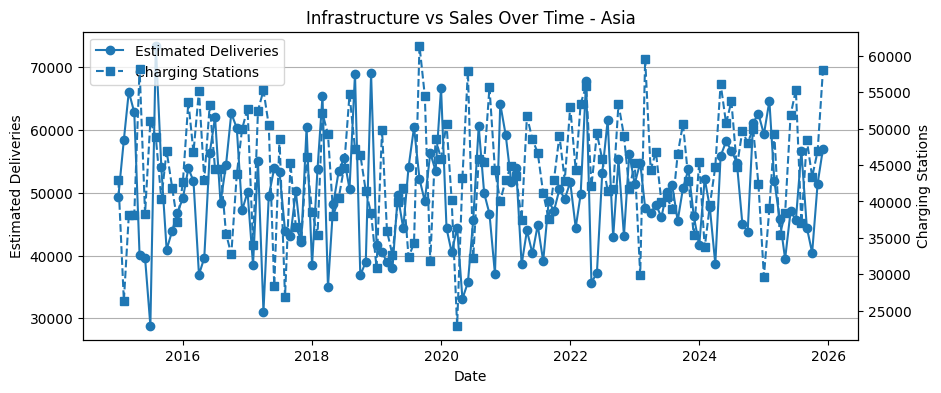

In [14]:
from pathlib import Path
import matplotlib.pyplot as plt

from src.tesla_data import load_tesla_data, split_by_region
from src.tesla_timeseries import (
    plot_monthly_deliveries,
    plot_production_vs_deliveries,
    plot_avg_price_ts,
    plot_model_share_ts,
    plot_battery_and_range_ts,
    plot_infra_vs_sales_ts,
)

data_path = Path("../data/tesla_deliveries_dataset_2015_2025.csv")
df = load_tesla_data(data_path)

region_dfs = split_by_region(df)

asia_df = region_dfs["Asia"]

plot_monthly_deliveries(asia_df, "Asia")
plt.show()

plot_production_vs_deliveries(asia_df, "Asia")
plt.show()

plot_avg_price_ts(asia_df, "Asia")
plt.show()

plot_model_share_ts(asia_df, "Asia")
plt.show()

plot_battery_and_range_ts(asia_df, "Asia")
plt.show()

plot_infra_vs_sales_ts(asia_df, "Asia")
plt.show()
